# Machine Learning em Drug Discovery
Projeto de Data Science no auxílio do processo de descoberta de novos medicamentos com Machine Learning.

## Um pouco sobre mim
Olá! Eu sou o Victor Shirasuna, estudante em Sistemas de Informação na Unicamp. Desde adolescente vi o poder da programação, principalmente em jogos, mas me interessei ainda mais na área de Data Science em um breve contato quando entrei na faculdade.

## 1. Entendendo o **Problema**
A área de **Drug Discovery não é minha especialidade**, mas pesquisando mais sobre o assunto, sabemos que envolve todo um **processo** em que são descobertos **novos medicamentos** em **potencial**. <br>
Podemos auxiliar nesse processo através da **predição** de se algum **efeito farmacológico** **foi ativado ou não** no experimento. Isso **pode ajudar**, posteriormente, na **identificação** de potenciais fármacos por um especialista.<br>

## 2. Coleta dos Dados
* Os dados foram coletados a partir de um Fork do [repositório no Github do Desafio Final Imersão Dados da Alura](https://github.com/alura-cursos/imersao-dados-desafio-final). A pasta Dados contém tanto os dados de **experimento** quanto os de **resultados**.

In [1]:
### Importação das bibliotecas para manipulação e visualização das bases de dados ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [2]:
### Importando a base de dados de experimentos ###
dataset = pd.read_csv('https://github.com/vichShir/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression='zip')
dataset.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
### Importando a base de dados de resultados ###
dataset_results = pd.read_csv('https://github.com/vichShir/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Processamento e Organização dos Dados

### 3.1.1 Verificando as Colunas do Dataset de Experimentos

In [4]:
### Verificando as colunas existentes do dataset ###
colunas_dataset = dataset.columns
colunas_dataset

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [5]:
### Determinando a quantidade de colunas do dataset ###
print('Dataset de experimentos contém ao todo: {} colunas.'.format(len(colunas_dataset)))

Dataset de experimentos contém ao todo: 877 colunas.


No **dataset de experimentos**, percebemos que as colunas de **expressões gênicas** (g-0 até g-x) e as **viabilidades celulares** (c-0 até c-x) estão **numeradas**.

In [6]:
### Determinando a quantidade de colunas de expressões gênicas (g-x) ###
quantidade_g = 0

for coluna in colunas_dataset:
    if 'g-' in coluna:
        quantidade_g += 1
        
print('Das quais, {} representam a expressão gênica.'.format(quantidade_g))

Das quais, 772 representam a expressão gênica.


Sabemos que as **expressões gênicas** estão numeradas de **g-0 até g-771**.

In [7]:
### Determinando a quantidade de colunas de viabilidade celular (c-x) ###
quantidade_c = 0

for coluna in dataset.columns:
    if 'c-' in coluna:
        quantidade_c += 1
        
print('E {} representam a viabilidade celular.'.format(quantidade_c))

E 100 representam a viabilidade celular.


Sabemos, as **viabilidades celulares** estão numeradas de **c-0 até c-99**.

O **dataset de experimentos**, além dessas colunas, possui também outras 5: **id, tratamento, tempo, dose e droga**.

### 3.1.2 Verificando as Colunas do Dataset de Resultados

In [8]:
### Verificando as colunas existentes do dataset ###
colunas_dataset_results = dataset_results.columns
colunas_dataset_results

Index(['id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [9]:
### Determinando a quantidade de colunas do dataset ###
print('Dataset de resultados contém ao todo: {} colunas.'.format(len(colunas_dataset_results)))

Dataset de resultados contém ao todo: 207 colunas.


As colunas do **dataset de resultados** representam os **Mecaninsmos de Ação** e nas **linhas** se houve a sua **ativação**, demarcado em **1**.

### 3.2.1 Verificando os Registros do Dataset de Experimentos (linhas)

In [10]:
### Contar a quantidade de registros do dataset ###
# Se a coluna id representa o identificador de cada registro, pressumi-se que este seja o valor total de linhas
print('Dataset de experimentos tem {} linhas.'.format(dataset['id'].value_counts().sum()))

Dataset de experimentos tem 23814 linhas.


In [11]:
### Determinar quantos valores nulos existem no dataset ###

# Quantidade dos valores nulos totais do dataset
qtd_valores_null = 0

# Somar a quantidade de valores nulos de cada coluna na variável de controle
for coluna in colunas_dataset:
    qtd_valores_null += dataset[coluna].isnull().sum()

print('Existem ao todo: {} valores nulos no dataset de experimentos'.format(qtd_valores_null))

Existem ao todo: 0 valores nulos no dataset de experimentos


Todos os **registros** do dataset estão completos e **não** há **dados ausentes**.

### 3.2.2 Verificando os Registros do Dataset de Resultados (linhas)

In [12]:
### Contar a quantidade de registros do dataset ###
# Se a coluna id representa o identificador de cada registro, pressumi-se que este seja o valor total de linhas
print('Dataset de resultados tem {} linhas.'.format(dataset_results['id'].value_counts().sum()))

Dataset de resultados tem 23814 linhas.


In [13]:
### Determinar quantos valores nulos existem no dataset ###

# Quantidade dos valores nulos totais do dataset
qtd_valores_null = 0

# Somar a quantidade de valores nulos de cada coluna na variável de controle
for coluna in dataset_results:
    qtd_valores_null += dataset_results[coluna].isnull().sum()

print('Existem ao todo: {} valores nulos no dataset de resultados'.format(qtd_valores_null))

Existem ao todo: 0 valores nulos no dataset de resultados


Nota-se que o número de **linhas é igual** em **ambos os datasets** e possuem a mesma **coluna id**. Podemos **relacionar** os datasets pelo **id**.

### 3.3.1 Tratamento do Dataset de Experimentos

In [15]:
### Apenas renomear a coluna droga para composto ###

# Renomear as colunas com DICIONÁRIO E .RENAME
mapa = {'droga': 'composto'}
dataset.rename(columns=mapa, inplace=True)

Renomeando a coluna **"droga"** para **"composto"**

In [16]:
### Dataset de Experimentos Final ###
dataset.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### 3.3.2 Tratamento do Dataset de Experimentos

In [17]:
### Dataset de Resultados Final ###
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Sem alterações **necessárias**.

## 4. Análise Exploratória

### 4.1 Informações Gerais

In [18]:
dataset.shape

(23814, 877)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [20]:
dataset.dtypes

id             object
tratamento     object
tempo           int64
dose           object
composto       object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

In [21]:
### Variável contendo a tabela describe das expressões gênicas ###
g_describe = dataset.loc[:, 'g-0':'g-771'].describe()
g_describe

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

In [22]:
### Variável contendo a tabela describe das viabilidades celulares ###
c_describe = dataset.loc[:, 'c-0':'c-99'].describe()
c_describe

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,-0.486027,-0.473410,-0.508091,-0.510905,-0.306528,-0.452293,-0.337267,-0.473728,-0.619461,-0.330389,-0.454165,-0.496059,-0.383134,-0.295655,-0.443384,-0.449683,-0.597730,-0.431899,-0.501831,-0.288958,-0.385486,-0.434420,-0.322990,-0.545691,-0.461527,-0.350457,-0.477049,-0.209301,-0.598003,-0.397430,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,2.066695,2.058766,2.140051,2.170919,1.575507,1.974010,1.594663,2.079550,2.294899,1.641563,2.001374,2.023053,1.690235,1.536784,1.967079,1.899095,2.268931,1.916467,1.904629,1.521773,1.741182,1.988458,1.772399,2.201552,1.974772,1.751440,1.965178,1.287766,2.297375,1.838205,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.910000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,-0.564000,-0.546475,-0.555500,

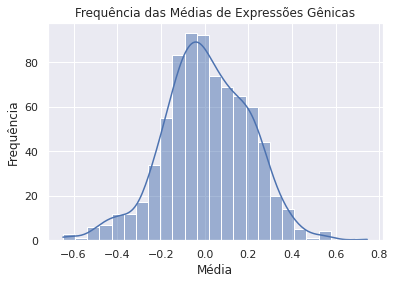

In [23]:
### Analisando a frequência das médias das expressões gênicas ###
sns.histplot(data=g_describe.T, x='mean', kde=True)

plt.title('Frequência das Médias de Expressões Gênicas')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

Nota-se que maior concentração dos dados das **médias** das **expressões gênicas**, encontra-se entre **-0.2 a ~0.1**. O **histograma** é característico do tipo **simétrico**.

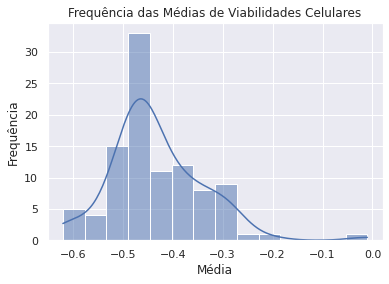

In [24]:
### Analisando a frequência das médias das viabilidades celulares ###
sns.histplot(data=c_describe.T, x='mean', kde=True)

plt.title('Frequência das Médias de Viabilidades Celulares')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

Nota-se que maior concentração dos dados das **médias** das **viabilidades celulares**, encontra-se entre **-0.5 a -0.3**. O **histograma** é característico do tipo **enviesado para a direita**.

### 4.2 Colunas

In [25]:
dataset['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [26]:
dataset['tempo'].unique()

array([24, 72, 48])

In [27]:
dataset['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [28]:
dataset['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [29]:
print('Há {} tipos de compostos.'.format(len(dataset['composto'].unique())))

Há 3289 tipos de compostos.


In [30]:
dataset['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

* Obs: Parece que os valores das **expressões gênicas** são **valores contínuos**

In [31]:
dataset['c-0'].unique()

array([-0.06  ,  0.0927, -0.1312, ...,  0.3509,  0.9538, -2.389 ])

* Obs: Parece que os valores das **viabilidades celulares** são **valores contínuos**

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [33]:
dataset['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [34]:
dataset['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

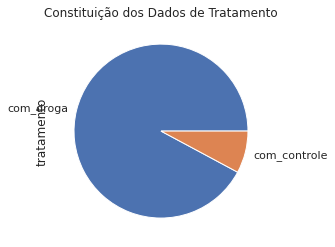

In [35]:
dataset['tratamento'].value_counts().plot.pie()

plt.title('Constituição dos Dados de Tratamento')
plt.show()

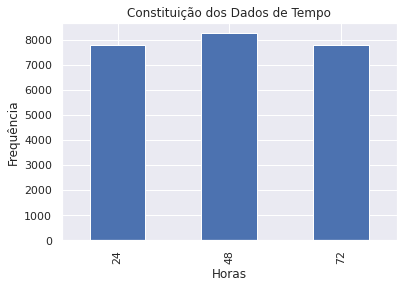

In [36]:
dataset['tempo'].value_counts().sort_index().plot.bar()

plt.title('Constituição dos Dados de Tempo')
plt.xlabel('Horas')
plt.ylabel('Frequência')
plt.show()

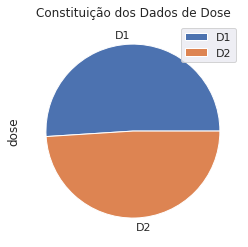

In [37]:
dataset['dose'].value_counts().plot.pie()
plt.legend(loc='best')
plt.title('Constituição dos Dados de Dose')
plt.show()

In [38]:
### COLETAR OS CÓDIGOS DOS 5 PRIMEIROS COMPOSTOS ###
cod_compostos = dataset['composto'].value_counts().sort_values(ascending=False).index[:5]

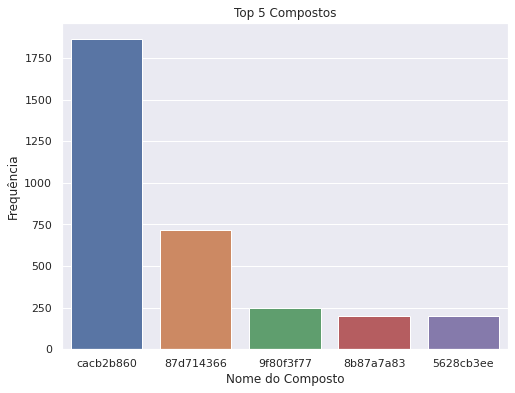

In [39]:
### GRÁFICO TOP 5 COMPOSTOS ###
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='composto', 
                   data=dataset.query('composto in @cod_compostos'),
                   order=cod_compostos)
ax.set_title('Top 5 Compostos')
plt.xlabel('Nome do Composto')
plt.ylabel('Frequência')
plt.show()

### 4.3 Explorando as Expressões Gênicas e Viabilidades Celulares

#### 4.3.1 Expressões Gênicas

In [40]:
### VISUALIZANDO OS VALORES UNICOS, MIN E MAX DE G-0 ###
print(len(dataset['g-0'].unique()))
print(dataset['g-0'].min())
print(dataset['g-0'].max())

14367
-5.513
10.0


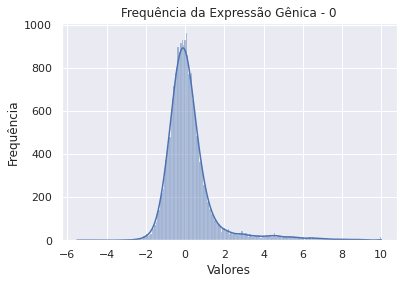

In [41]:
### HISTOGRAMA G-0 ###
sns.histplot(data=dataset['g-0'], kde=True)

plt.title('Frequência da Expressão Gênica - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

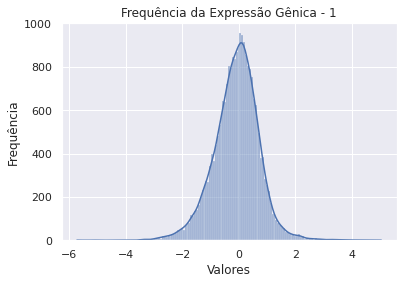

In [42]:
### HISTOGRAMA G-1 ###
sns.histplot(data=dataset['g-1'], kde=True)

plt.title('Frequência da Expressão Gênica - 1')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

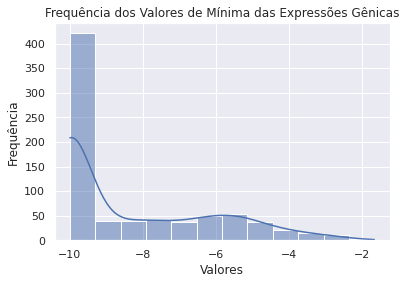

In [43]:
### HISTOGRAMA DAS MÍNIMAS DAS EXPRESSÕES GÊNICAS ###
sns.histplot(data=g_describe.T, x='min', kde=True)

plt.title('Frequência dos Valores de Mínima das Expressões Gênicas')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

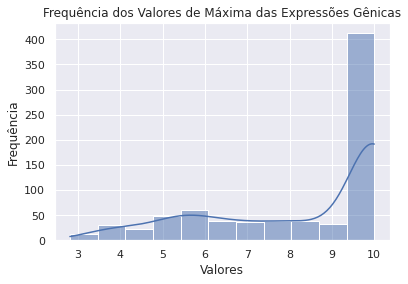

In [44]:
# HISTOGRAMA DAS MÁXIMAS DAS EXPRESSÕES GÊNICAS ###
sns.histplot(data=g_describe.T, x='max', kde=True)

plt.title('Frequência dos Valores de Máxima das Expressões Gênicas')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [45]:
g_describe.T['min'].sort_values(ascending=True)[0]

-10.0

In [46]:
g_describe.T['max'].sort_values(ascending=False)[0]

10.0

Nota-se que, a partir desses gráficos, os valores de **expressões gênicas** têm um intervalo aparente de **-10 e 10**. Possivelmente, estes dados foram **padronizados**.

#### 4.3.2 Viabilidades Celulares

In [47]:
### VISUALIZANDO OS VALORES UNICOS, MIN E MAX DE C-0 ###
print(len(dataset['c-0'].unique()))
print(dataset['c-0'].min())
print(dataset['c-0'].max())

14421
-10.0
3.365


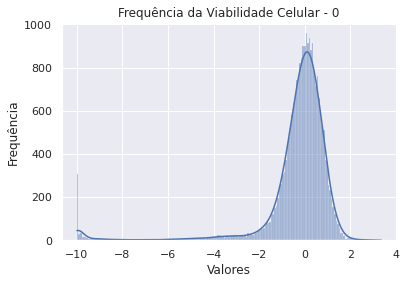

In [48]:
### HISTOGRAMA C-0 ###
sns.histplot(data=dataset['c-0'], kde=True)

plt.title('Frequência da Viabilidade Celular - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

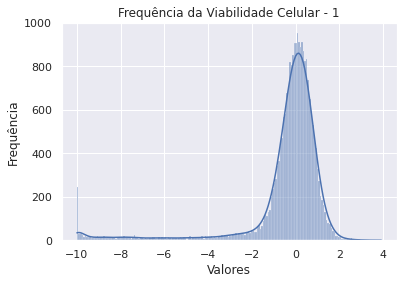

In [49]:
### HISTOGRAMA C-1 ###
sns.histplot(data=dataset['c-1'], kde=True)

plt.title('Frequência da Viabilidade Celular - 1')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

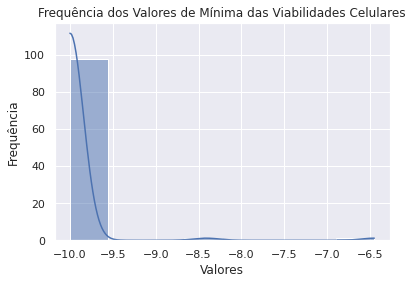

In [50]:
### HISTOGRAMA DAS MÍNIMAS DAS VIABILIDADES CELULARES ###
sns.histplot(data=c_describe.T, x='min', kde=True)

plt.title('Frequência dos Valores de Mínima das Viabilidades Celulares')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

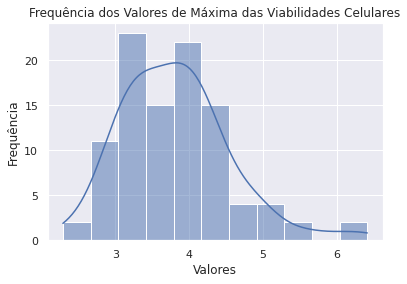

In [51]:
# HISTOGRAMA DAS MÁXIMAS DAS VIABILIDADES CELULARES ###
sns.histplot(data=c_describe.T, x='max', kde=True)

plt.title('Frequência dos Valores de Máxima das Viabilidades Celulares')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [52]:
c_describe.T['max'].sort_values(ascending=False)[0]

6.412000000000001

Nota-se, a partir desses gráficos, que os valores de **viabilidades celulares** parecem seguir o **mesmo intervalo** aparente das **expressões gênicas**.<br><br>
Contudo, a **máxima** foi de **6.41 e não até 10**. Pode ser que as **viabilidades celulares** estejam também padronizadas de -10 e 10, porém não houveram ocorrências de máxima, seja talvez por uma questão da **área de negócio**. <br><br>
Ou, simplesmente, a maior **concentração dos dados de máxima** está situada **"longe"** do possível limite máximo. Observa-se que o gráfico tende a ser **simétrico**, ao invés de ser enviesado à direita.

### 4.4 Distribuições com Boxplot

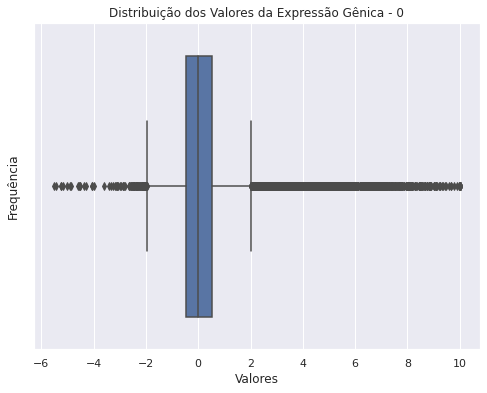

In [53]:
### BOXPLOT DO GENE G-0 ###
plt.figure(figsize=(8,6))
sns.boxplot(x='g-0', data=dataset)

plt.title('Distribuição dos Valores da Expressão Gênica - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

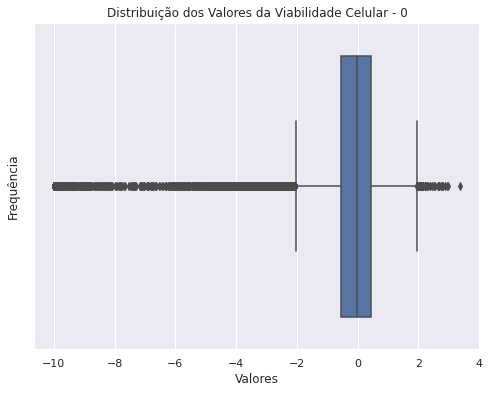

In [54]:
### BOXPLOT DO GENE C-0 ###
plt.figure(figsize=(8,6))
sns.boxplot(x='c-0', data=dataset)

plt.title('Distribuição dos Valores da Viabilidade Celular - 0')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

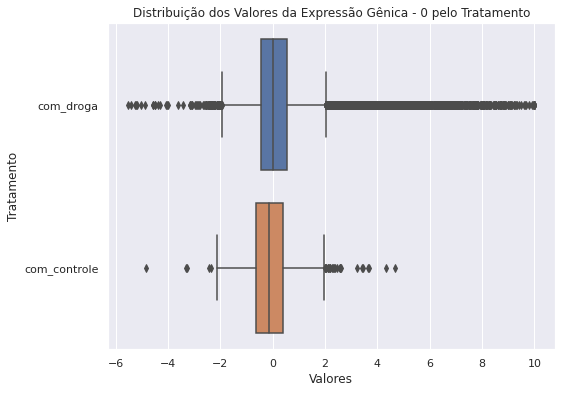

In [55]:
### BOXPLOT DO GENE G-0 DE ACORDO COM TRATAMENTO ###
plt.figure(figsize=(8,6))
sns.boxplot(x='g-0', y='tratamento', data=dataset)

plt.title('Distribuição dos Valores da Expressão Gênica - 0 pelo Tratamento')
plt.xlabel('Valores')
plt.ylabel('Tratamento')
plt.show()

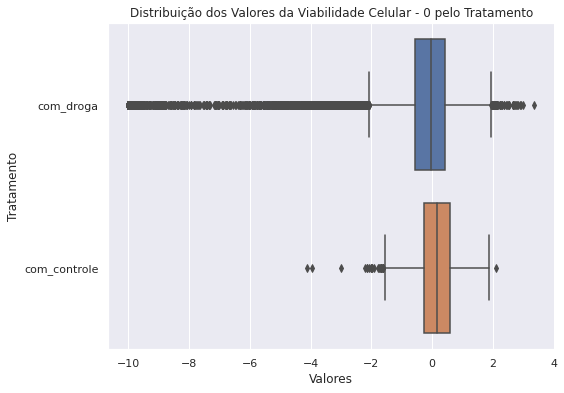

In [56]:
### BOXPLOT DE C-0 DE ACORDO COM TRATAMENTO ###
plt.figure(figsize=(8,6))
sns.boxplot(x='c-0', y='tratamento', data=dataset)

plt.title('Distribuição dos Valores da Viabilidade Celular - 0 pelo Tratamento')
plt.xlabel('Valores')
plt.ylabel('Tratamento')
plt.show()

### 4.5 Seleção de dados Tratamento e Dose

In [57]:
### AGRUPAMENTO DE TRATAMENTO E DOSE ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [58]:
### DADOS NORMALIZADOS ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [59]:
### NORMALIZADOS PELA LINHA (INDEX) ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [60]:
### AGRUPAMENTO DE TRATAMENTO E DOSE PELA MÉDIA ###
pd.crosstab([dataset['dose'], dataset['tempo']], dataset['tratamento'], values=dataset['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Observa-se que a composição de dados **com_controle** é bem menor do que a **com_droga**. Em contrapartida, os dados de **dose** estão bem equilibrados.

### 4.6 Gráficos de Dispersão

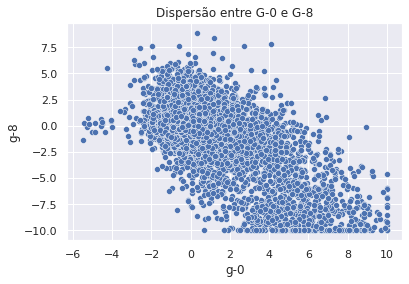

In [61]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 ###
sns.scatterplot(x='g-0', y='g-8', data=dataset)

plt.title('Dispersão entre G-0 e G-8')
plt.show()

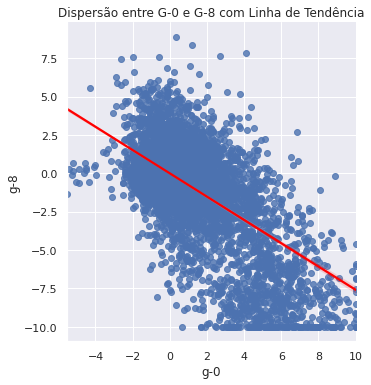

In [62]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'})

plt.title('Dispersão entre G-0 e G-8 com Linha de Tendência')
plt.show()

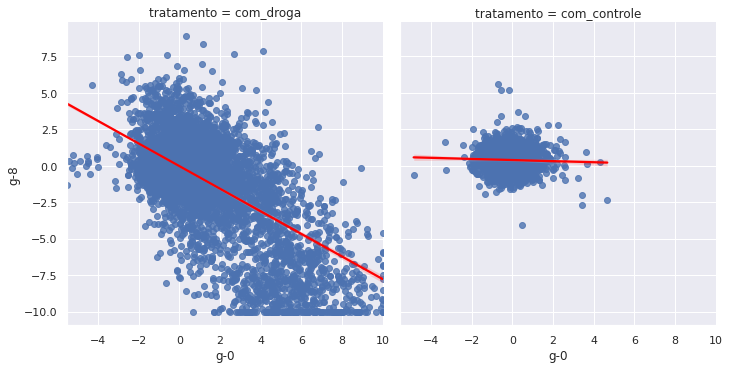

In [63]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA DE ACORDO COM O TRATAMENTO ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento')
plt.show()

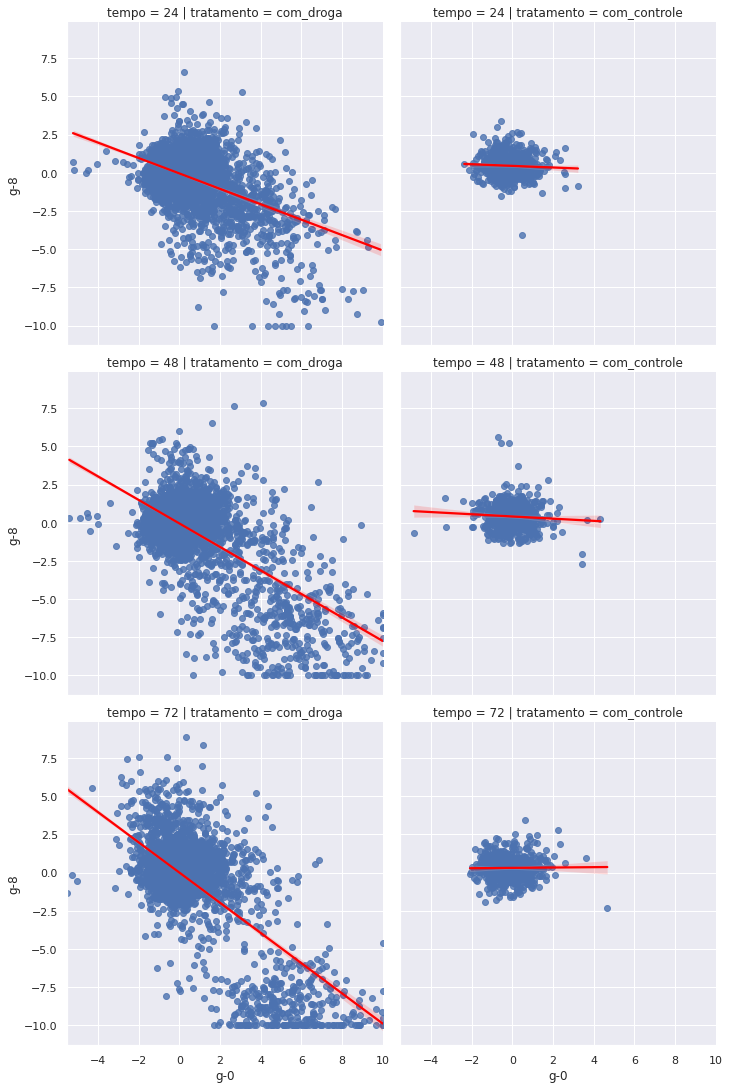

In [64]:
### GRÁFICO DE DISPERSÃO G-0 E G-8 COM LINHA DE TENDENCIA DE ACORDO COM O TRATAMENTO E TEMPO ###
sns.lmplot(data=dataset, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')
plt.show()

### 4.7 Correlação

#### 4.7.1 Expressões Gênicas

In [65]:
### CORRELAÇÃO ENTRE AS 50 PRIMEIRAS EXPRESSÕES GÊNICAS ###
corr_gene = dataset.loc[:, 'g-0':'g-50'].corr()
corr_gene.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675


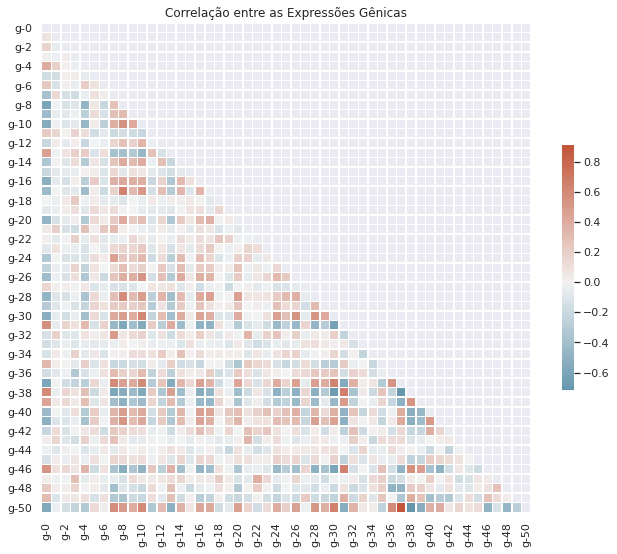

In [66]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_gene, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gene, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as Expressões Gênicas')
plt.show()

A **correlação** entre as **50 primeiras expressões gênicas** é **diversificada** e aparenta ser **fraca**. Há alguns pontos onde a correlação é maior, por exemplo, entre, mais ou menos, g-36 a g-37 com g-50.<br><br>
Assim, deduz-se que as **expressões gênicas**, podem ser **independentes** umas das outras.

#### 4.7.2 Viabilidades Celulares

In [67]:
### CORRELAÇÃO ENTRE AS 50 PRIMEIRAS VIABILIDADES CELULARES ###
corr_celular = dataset.loc[:, 'c-0':'c-50'].corr()
corr_celular.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,0.904528,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843


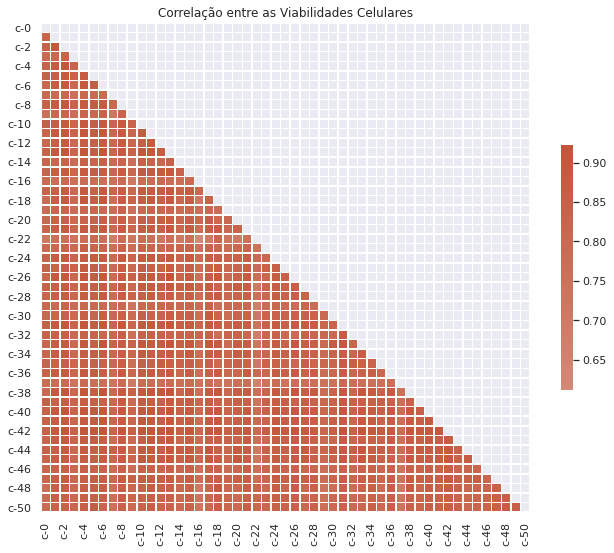

In [68]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as Viabilidades Celulares')
plt.show()

A **correlação** entre as **50 primeiras viabilidades celulares** é bem **maior** que as expressões gênicas. Percebe-se, praticamente, que o gráfico todo está **destacado**, até porque o intervalo de correlação é menor, mas possui valores altos de correlação.<br><br>
Pode ser que as **viabilidades celulares** se correlacionem, mas no entanto, **não quer dizer** que há um **efeito de causalidade** entre elas.

### 4.8 Analisando Tabela de Resultados

In [69]:
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
### ANALISANDO OS VALORES DA COLUNA ###
dataset_results['acat_inhibitor'].unique()

array([0, 1])

In [71]:
### ANALISANDO OS VALORES DA COLUNA ###
dataset_results['acetylcholine_receptor_agonist'].unique()

array([0, 1])

In [72]:
### Contagem do Mecanismo de Ativação ###
contagem_moa = dataset_results.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

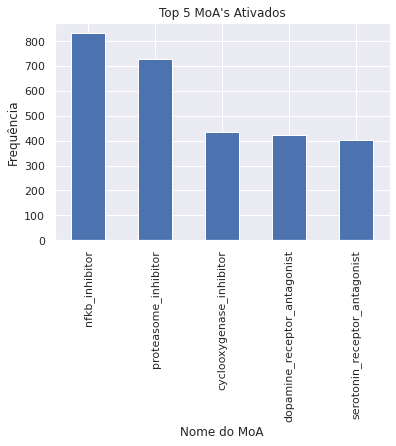

In [73]:
### GRÁFICO TOP 5 MOA'S ATIVADOS ###
contagem_moa[:5].plot.bar()

plt.title("Top 5 MoA's Ativados")
plt.xlabel('Nome do MoA')
plt.ylabel('Frequência')
plt.show()

### 4.9 Cruzamento de Dados de Experimento com tabela de Resultados

In [74]:
### Numero de MOA ativos (Por Registro) ###
dataset_results.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [75]:
### Criar coluna com Numero de MOA ###
dataset_results['n_moa'] = dataset_results.drop('id', axis=1).sum(axis=1)

In [76]:
### Criar coluna Se foi Ativo MOA ###
dataset_results['ativo_moa'] = (dataset_results['n_moa'] != 0)
dataset_results.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [77]:
### Combinar as 2 Tabelas de acordo com o ID ###
dataset_merged = pd.merge(dataset, dataset_results[['id', 'n_moa', 'ativo_moa']], on='id')
dataset_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [78]:
### Vendo se os Com Controle não possuem Ativo do Composto ###
dataset_merged.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [79]:
### Vendo se alguma Com Droga não Ativou o Composto ###
dataset_merged.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

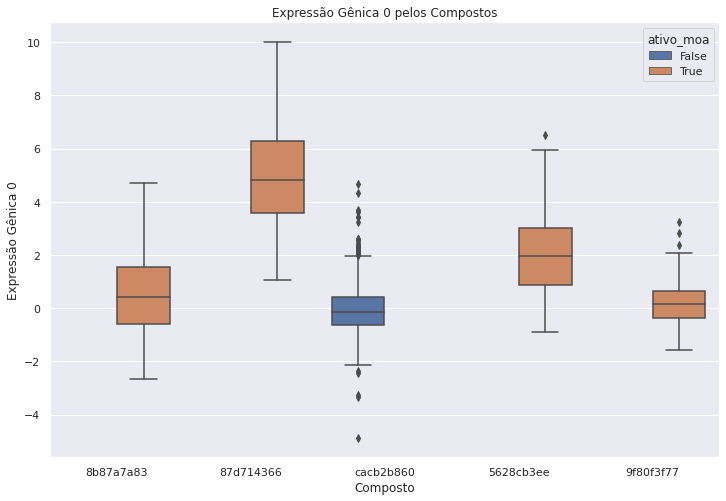

In [80]:
### Boxplot do g-0 pelos compostos e ativo_moa ###

composto_principal = dataset_merged['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(y='g-0', x='composto', data=dataset_merged.query('composto in @composto_principal'), hue='ativo_moa')

plt.title('Expressão Gênica 0 pelos Compostos')
plt.xlabel('Composto')
plt.ylabel('Expressão Gênica 0')
plt.show()

### 4.10 Análise de Correlação com Pairplot 

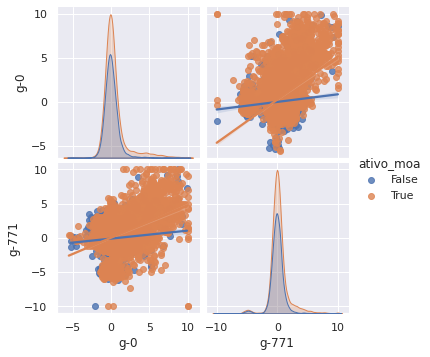

In [81]:
### EXPRESSÕES GÊNICAS ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-0', 'g-771'], kind='reg')
plt.show()

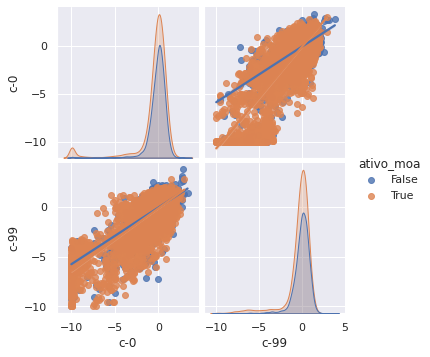

In [82]:
### VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['c-0', 'c-99'], kind='reg')
plt.show()

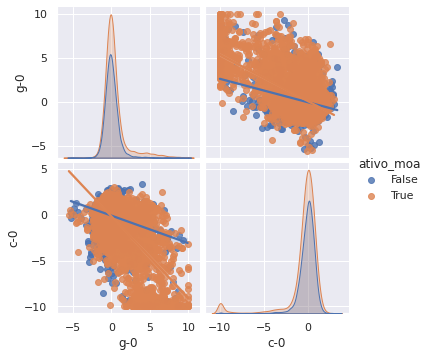

In [83]:
### EXPRESSÃO GÊNICA E VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-0', 'c-0'], kind='reg')
plt.show()

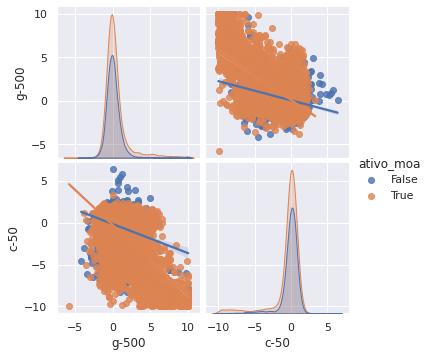

In [84]:
### EXPRESSÃO GÊNICA E VIABILIDADE CELULAR ###
sns.pairplot(dataset_merged, hue='ativo_moa', vars=['g-500', 'c-50'], kind='reg')
plt.show()

Vemos nos 4 gráficos a dispersão entre os dados de expressões gênicas e viabilidade celular, a fim de correlacioná-los em grupos (clusters) por ativo_moa no dataset_merged.<br><br>
Contudo, é possível notar que os dados, que estão divididos em se o MoA foi ativado ou não, estão demasiadamente agrupados. Ou seja, os conglomerados de dados para identificação do separador (ativo_moa) estão sobrepostos, o que poderá talvez dificultar a predição do valor (ativo_moa).

## 5. Desenvolvimento de Modelos e Algoritmos

In [85]:
## BASE DE DADOS AGRUPADA PARA MODELOS DE MACHINE LEARNING
dataset_merged.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


### 5.1 Machine Learning - Target Array: Ativação do MoA
Abaixo, tem-se os **passos** (readequados) de ML que aprendi:
1. Organize os dados em uma ***feature matrix*** e um ***target array***.
2. Escolha uma **classe de modelo** importando do Scikit.
3. Escolha os **hiperparâmetros** do modelo instaciando a classe escolhida no Passo I.
4. Ajuste o modelo invocando o método **fit()**.
5. Aplique o modelo aos novos dados usando **predict()**.<br>

### 5.1.1 Organizando os dados

In [86]:
#Passo 1.1: Feature Matrix
X_moa = dataset_merged.drop(['id', 'composto', 'n_moa', 'ativo_moa'], axis=1)
X_moa = pd.get_dummies(X_moa, columns=['tratamento', 'tempo', 'dose'])
X_moa.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72,dose_D1,dose_D2
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,1,0,0,1,0
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,0,1,1,0
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0,1,0,1,0
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0,1,0,1,0
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,0,0,1,0,1


In [87]:
#Passo 1.2: Target Array
y_moa = dataset_merged.ativo_moa
y_moa.head()

0     True
1    False
2     True
3    False
4     True
Name: ativo_moa, dtype: bool

In [88]:
#Passo 1.3: Separação da Base de Dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moa, y_moa, random_state=2021, train_size=0.8)

#### 5.1.2 Por Logistic Regression

Obs: Os **modelos** foram utilizados **sem parâmetro**, para podermos **comparar** os resultados com o processo de **hiperparametros**, posteriormente.

In [92]:
from sklearn.linear_model import LogisticRegression     # Passo 2: escolha do modelo
model_logreg = LogisticRegression(max_iter=1000)        # Passo 3: escolha dos hiperparâmetros e instanciação

In [93]:
#Passo 4: Ajuste o modelo aos dados
model_logreg.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_logreg = model_logreg.predict(X_test)

In [94]:
#Verificando a acurácia do modelo escolhido
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, y_model_logreg)
print('Acurácia Logistic Regression: {}'.format(accuracy_logreg))

Acurácia Logistic Regression: 0.6760445097627545


#### 5.1.3 Por Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier      # Passo 2: escolha do modelo
model_decisiontree = DecisionTreeClassifier()        # Passo 3: escolha dos hiperparâmetros e instanciação

In [96]:
#Passo 4: Ajuste o modelo aos dados
model_decisiontree.fit(X_train, y_train)
#Passo 5: Faça predições em dados novos
y_model_decisiontree = model_decisiontree.predict(X_test)

In [97]:
#Verificando a acurácia do modelo escolhido
accuracy_decisiontree = accuracy_score(y_test, y_model_decisiontree)
print('Acurácia Decision Tree: {}'.format(accuracy_decisiontree))

Acurácia Decision Tree: 0.6073903002309469


### 5.2 Hiperparâmetros

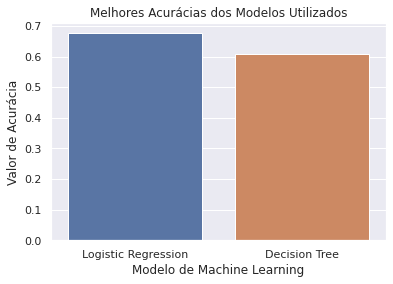

In [98]:
### Gráfico das acurácias dos modelos SEM hiperparametro ###

# Series com os valores das acurácias de cada modelo
model_accuracies = pd.Series([accuracy_logreg,
                              accuracy_decisiontree],
                             index=['Logistic Regression', 'Decision Tree'])
# Colocando as acurácias em ordem decrescente
model_accuracies.sort_values(ascending=False, inplace=True)
# Plotando o gráfico
sns.barplot(x=model_accuracies.index, y=model_accuracies)

plt.title('Melhores Acurácias dos Modelos Utilizados')
plt.xlabel('Modelo de Machine Learning')
plt.ylabel('Valor de Acurácia')
plt.show()

* Podemos **melhorar** os nossos modelos ajustando os seus **parâmetros**.
* Como a **base de dados** é demasiadamente **volumosa**, utiliza-se a técnica de **Random Search**, que reduz o nível de processamento dessa busca.
* A partir dos valores de **acurácia** determinados por **cada modelo**, escolheu-se o de **Logistic Regression** para o processo de tuning dos hiperparâmetros por ter a maior acurácia.

#### 5.2.2 Random Search

In [99]:
## Importando o Random Search
from sklearn.model_selection import RandomizedSearchCV
## Importando o módulo para pré-processamento de dados
from sklearn.preprocessing import StandardScaler
## Importando o módulo de pipeline
from sklearn.pipeline import Pipeline
## Importando a função para determinar um intervalo de valores inteiros
from scipy.stats import randint
import numpy as np

In [118]:
## Criar Pipeline com Standard Scaler e DecisionTreeClassifier
standardScaler = StandardScaler()
model_logreg = LogisticRegression()
## Pipeline com a transformação dos dados padronizados com StandardScaler
pipeline = Pipeline([('transformer', standardScaler), ('predictor', model_logreg)])

## Definir intervalo de valores dos hiperparametros
param_dist = dict(
    predictor__solver = ['newton-cg', 'saga'],
    predictor__C = [0.1, 1, 10]
)

## Random Search
clf = RandomizedSearchCV(pipeline, param_dist, random_state=2021, cv=5, return_train_score=True, n_iter=6, scoring='accuracy')
search = clf.fit(X_moa, y_moa)
results_RandomizedSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_

## Escolhendo o melhor resultado
print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

mean_train_score 0.71
mean_test_score 0.68


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [119]:
## Os hiperparametros do melhor resultado
results_RandomizedSearchCV['params'][indice_melhores_parametros]

{'predictor__C': 0.1, 'predictor__solver': 'saga'}

## 6. Visualização dos Dados

### 6.1 Análise dos Resultados (Matriz de Confusão)

#### 6.1.1 Logistic Regression (Sem Hiperparâmetros)

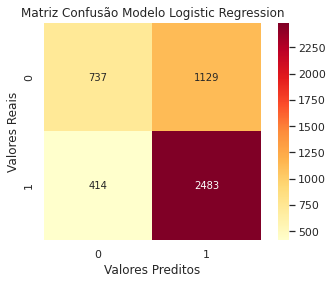

In [120]:
from sklearn.metrics import confusion_matrix
mat_logreg = confusion_matrix(y_test, y_model_logreg)

sns.heatmap(mat_logreg, square=True, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Matriz Confusão Modelo Logistic Regression')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

#### 6.1.1 Decision Tree (Sem Hiperparâmetros)

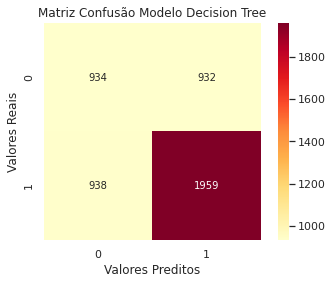

In [121]:
from sklearn.metrics import confusion_matrix
mat_decisiontree = confusion_matrix(y_test, y_model_decisiontree)

sns.heatmap(mat_decisiontree, square=True, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Matriz Confusão Modelo Decision Tree')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

### 6.2 Métricas

#### 6.2.1 Accuracy

In [122]:
### Função de acurácia ###

### O quão frequente o classificador está correto?
# A soma de todos os valores preditos divido pelo total
def accuracy(target, prediction):
  return (target == prediction).sum()/len(target)

## Variáveis com os valores de acurácia com e sem hiperparâmetros
accuracy_com_hip = accuracy(y_moa, clf.predict(X_moa))
accuracy_sem_hip = accuracy(y_test, y_model_logreg)

print("Com hiperparâmetro: %f" %accuracy_com_hip)
print("Sem hiperparâmetro: %f" %accuracy_sem_hip)

Com hiperparâmetro: 0.705005
Sem hiperparâmetro: 0.676045


#### 6.2.2 Precision

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
### Função de precisão ###

### Daqueles que classifiquei como corretos, quantos efetivamente eram?
# Valores de True-Positivo divido pela soma dos True-Positivo e False-Positive, indicando a precisão de alegar True-Positivos
def precision(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fp)

## Variáveis com os valores de precisão com e sem hiperparâmetros
precision_com_hip = precision(y_moa, clf.predict(X_moa))
precision_sem_hip = precision(y_test, y_model_logreg)

print("Com hiperparâmetro: %f" %precision_com_hip)
print("Sem hiperparâmetro: %f" %precision_sem_hip)

Com hiperparâmetro: 0.699409
Sem hiperparâmetro: 0.687431


#### Abaixo, verifica-se melhor os resultados da precisão com a Matriz de Confusão:

737 1129 414 2483


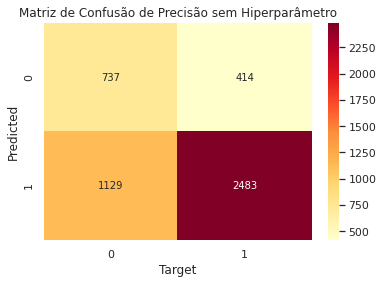

In [126]:
### Matriz de Confusão SEM hiperparametro ###
matriz_semhip = confusion_matrix(y_test, y_model_logreg)

## True-Negative / False-Positive / False-Negative / True-Positive
tn, fp, fn, tp = matriz_semhip.ravel()

print(tn, fp, fn, tp)

## Colocar a transposta da matriz
sns.heatmap(matriz_semhip.T, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title("Matriz de Confusão de Precisão sem Hiperparâmetro")
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

3773 5594 1431 13016


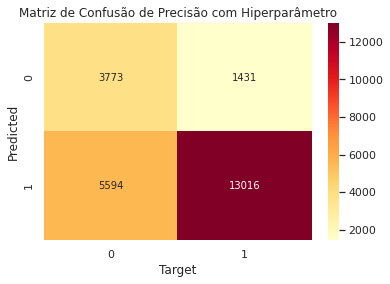

In [127]:
### Matriz de Confusão COM hiperparametro ###
matriz_comhip = confusion_matrix(y_moa, clf.predict(X_moa))

## True-Negative / False-Positive / False-Negative / True-Positive
tn, fp, fn, tp = matriz_comhip.ravel()

print(tn, fp, fn, tp)

## Colocar a transposta da matriz
sns.heatmap(matriz_comhip.T, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title("Matriz de Confusão de Precisão com Hiperparâmetro")
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

#### 6.2.3 Recall

In [128]:
### Função de recall ###

### É a frequência em que o classificador encontra os exemplos de uma classe
# Valores de True-Positivo divido pela soma dos True-Positivo e False-Negativo
def recall(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fn)

## Variáveis com os valores de recall com e sem hiperparâmetros
recall_com_hip = recall(y_moa, clf.predict(X_moa))
recall_sem_hip = recall(y_test, y_model_logreg)

print("Com hiperparâmetro: %f" %recall_com_hip)
print("Sem hiperparâmetro: %f" %recall_sem_hip)

Com hiperparâmetro: 0.900948
Sem hiperparâmetro: 0.857094


#### 6.2.4 Medida F1

In [130]:
### Função de medida f1 ###

### Combina precisão e recall de modo a trazer um número único que indique a qualidade geral do modelo
# Média harmônica do recall e precision
def medida_f(target, prediction):
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec + prec)

## Variáveis com os valores de medida F1 com e sem hiperparâmetros
medidaF1_com_hip = medida_f(y_moa, clf.predict(X_moa))
medidaF1_sem_hip = medida_f(y_test, y_model_logreg)

print("Com hiperparâmetro: %f" %medidaF1_com_hip)
print("Sem hiperparâmetro: %f" %medidaF1_sem_hip)

Com hiperparâmetro: 0.787488
Sem hiperparâmetro: 0.762944


#### 6.2.5 Specificity

In [131]:
### Função de especificidade ###

### A capacidade do sistema em predizer corretamente a ausência da condição para casos que realmente não a têm
# Valores de True-Negative divido pela soma dos total de negativos
def specificity(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn + fp)

## Variáveis com os valores de especificidade com e sem hiperparâmetros
specificity_com_hip = specificity(y_moa, clf.predict(X_moa))
specificity_sem_hip = specificity(y_test, y_model_logreg)

print("Com hiperparâmetro: %f" %specificity_com_hip)
print("Sem hiperparâmetro: %f" %specificity_sem_hip)

Com hiperparâmetro: 0.402797
Sem hiperparâmetro: 0.394962


## 7. Tomada de Decisão

### 7.1 Análise das Métricas

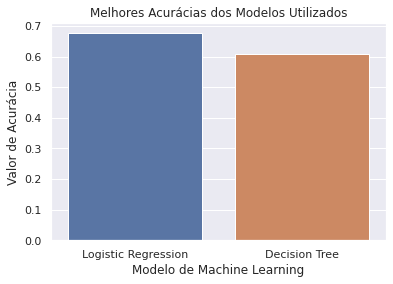

In [132]:
### Gráfico das acurácias dos modelos SEM hiperparametro ###

# Series com os valores das acurácias de cada modelo
model_accuracies = pd.Series([accuracy_logreg,
                              accuracy_decisiontree],
                             index=['Logistic Regression', 'Decision Tree'])
# Colocando as acurácias em ordem decrescente
model_accuracies.sort_values(ascending=False, inplace=True)
# Plotando o gráfico
sns.barplot(x=model_accuracies.index, y=model_accuracies)

plt.title('Melhores Acurácias dos Modelos Utilizados')
plt.xlabel('Modelo de Machine Learning')
plt.ylabel('Valor de Acurácia')
plt.show()

In [133]:
## Acurácia modelo Random Forest sem hiperparâmetros
print('Acurácia Random Forest: {}'.format(accuracy_logreg))

Acurácia Random Forest: 0.6760445097627545


In [134]:
## Acurácia modelo Decision Tree com hiperparâmetros
print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.4f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.4f}")

mean_train_score 0.7105
mean_test_score 0.6755


In [135]:
### Gráfico com as medidas de cada métrica ###

# Tabela com os valores, tipos e se foi sem ou com hiperparamentro de cada métrica empregada
df_metrics = pd.DataFrame(
    {
        'hiperparametro': ['com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip', 'com_hip', 'sem_hip'],
        'metricas': [accuracy_com_hip, accuracy_sem_hip,
                      precision_com_hip, precision_sem_hip,
                      recall_com_hip, recall_sem_hip,
                      medidaF1_com_hip, medidaF1_sem_hip,
                      specificity_com_hip, specificity_sem_hip],
        'tipo_metrica': ['accuracy', 'accuracy', 'precision', 'precision', 'recall', 'recall', 'medida_F1', 'medida_F1', 'specificity', 'specificity']
    }
)

df_metrics

,hiperparametro,metricas,tipo_metrica
0,com_hip,0.705005,accuracy
1,sem_hip,0.676045,accuracy
2,com_hip,0.699409,precision
3,sem_hip,0.687431,precision
4,com_hip,0.900948,recall
5,sem_hip,0.857094,recall
6,com_hip,0.787488,medida_F1
7,sem_hip,0.762944,medida_F1
8,com_hip,0.402797,specificity
9,sem_hip,0.394962,specificity


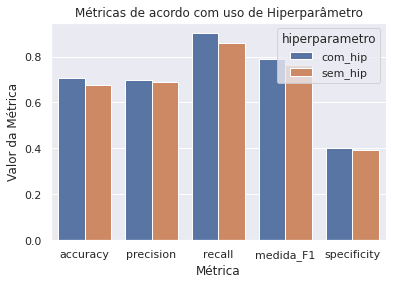

In [136]:
sns.barplot(x='tipo_metrica', y='metricas', hue='hiperparametro', data=df_metrics)

plt.title('Métricas de acordo com uso de Hiperparâmetro')
plt.xlabel('Métrica')
plt.ylabel('Valor da Métrica')
plt.show()

Apesar do modelo **com hiperparâmetro** superar o sem, é perceptível que os resultados **são muito próximos**. Mas quais **delas importam** mais para o nosso **problema**? Para isso devemos responder a algumas **perguntas levantadas**:
<br><br>
**Do que se trata o problema?**
<br>
O problema consiste em identificar se o Mecanismo de Ação foi ativado ou não dada uma assinatura.
<br><br>
**Um resultado positivo significa o que?**
<br>
Um resultado positivo significa que o MoA foi ativado.
<br><br>
**Um resultado negativo significa o que?**
<br>
Um resultado positivo significa que o MoA não foi ativado.
<br><br>
**O que implica se o MoA foi ativado?**
<br>
Se o MoA foi ativado, significa que algum efeito farmacológico será produzido.
<br><br>
**O que implica se o MoA não foi ativado?**
<br>
Se o MoA não foi ativado, significa que nenhum efeito farmacológico será produzido.
<br><br>
**O modelo do problema precisa estar frequentemente correto?**
<br>
Sim, pois como queremos descobrir novos medicamentos que possam ser utilizados para tratar sintomas ou doenças, assim queremos garantir que o medicamente seja eficaz.
<br><br>
**O modelo do problema precisa ser preciso?**
<br>
Sim, pois por talvez questões de segurança da disponibilização do possível medicamento, queremos que o modelo prediza corretamente quais MoA's foram ativados.
<br><br>
**O modelo do problema precisa ter uma boa revocação?**
<br>
Sim, pois não tento uma boa revocação implica dizer que um MoA que foi ativado será classificado como não ativado pelo modelo. Assim, este possivelmente será descartado, porém poderia ser a solução para o tratamento de um sintoma/doença.
<br><br>
**O modelo do problema precisa ter uma boa qualidade geral?**
<br>
Sim, pois devemos nos certificar que os MoA's foram de fato ativados ou não. Podendo ser a solução de um tratamento ou comprometer a saúde do paciente.
<br><br>
**O modelo do problema precisa ter uma boa especificidade?**
<br>
Acredito que não seja uma prioridade, não ter uma boa especificidade implica dizer que é a porcentagem de amostras negativas identificadas corretamente sobre o total de amostras de negativas. Ou seja, seria a capacidade de identificar quantos MoA's não ativados foram classificados pelo modelo sobre o todo de MoA's não ativados.

### 7.2 Conclusões

**Com isso, percebemos que nosso problema em questões de métricas, precisa ter boa acurácia, precisão, recall e média harmônica. Pois o descobrimento de novos medicamentos na área de Drug Discovery implica nos efeitos que tais fármacos irão afetar nos pacientes, como também a descoberta desses possíveis compostos.**
<br><br>
**Notamos que o modelo de Decision Tree Classifier com hiperparâmetros se demonstrou o mais adequado. Contudo, não o suficiente para as questões levantadas com a análise das métricas para a área de Drug Discovery.**
<br><br>
Agredeço ao time da **Alura** por essa **Imersão de Dados** gratuita, gostei bastante do **desafio** e consegui tentar **melhorar** minhas habilidades de **análise de dados** com este projeto. Continuo buscando **aprender e **praticar cada vez mais nessa área.